## 线性回归

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_style('white')

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 绘制回归曲线有两个函数可用：
+ regplot
+ lmplot

它们的大部分核心功能是共享的

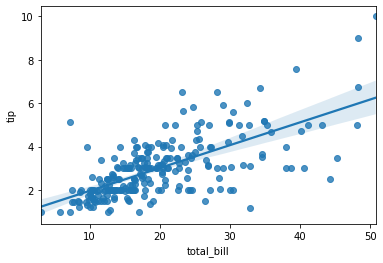

In [3]:
sns.regplot(x='total_bill', y='tip', data=tips)

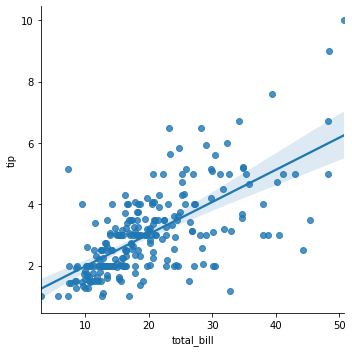

In [4]:
sns.lmplot(x='total_bill', y='tip', data=tips)

$regplot$绘制的是一个长方形，而$lmplot$绘制的是正方形；这是因为$regplot$是轴级功能，可以制作多面板图形并精准控制回归图的位置，具有和其他matplotlib函数相同的大小和形状，要控制大小，需要自己创建图形对象；  
而$lmplot$的大小和形状是通过$FaceGrid$界面使用`size`和`aspect`参数控制的

$regplot$接受各种格式的`x`和`y`变量；但$lmplot$的`x`和`y`变量必须指定为字符串  

$regplot$只能显示一对变量之间的关系，而$lmplot$结合了`regplot`和`FacetGrid`，允许探索最多其他三个分类变量的影响

In [7]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [9]:
anscombe.query('dataset == "III"')

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


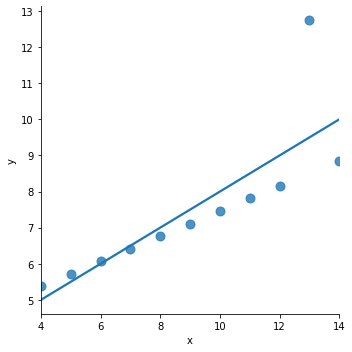

In [12]:
sns.lmplot(x='x', y='y', data=anscombe.query('dataset == "III"'), ci=None, scatter_kws={"s" : 80})

### 离群点
> 存在离群点时，设置`robust=True`开启稳健回归，可以降低离群点造成的影响

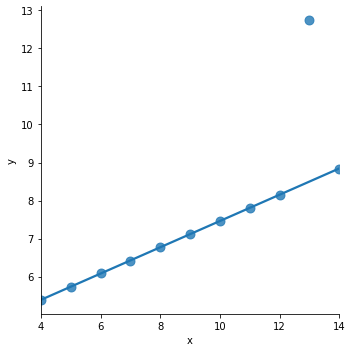

In [18]:
sns.lmplot(x='x', y='y', data=anscombe.query('dataset == "III"'), ci=None, robust=True, scatter_kws={"s" : 80})

## 离散值变量的回归

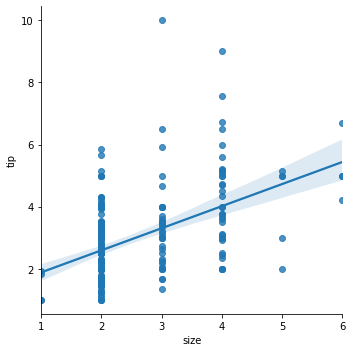

In [19]:
sns.lmplot(x='size', y='tip', data=tips)

虽然也可以对离散点进行拟合线性回归，但是得到的简单散点图不是最优的。可以向离散值添加一些随机噪声(抖动)以便使这些值的分布更加清晰  
抖动仅应用于散点图数据，不会影响回归拟合

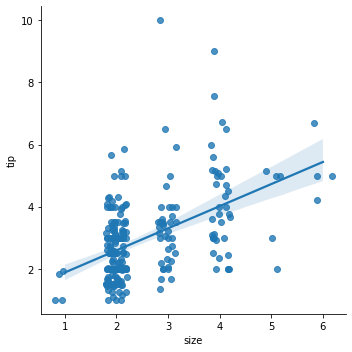

In [20]:
sns.lmplot(x='size', y='tip', x_jitter=0.2, data=tips)

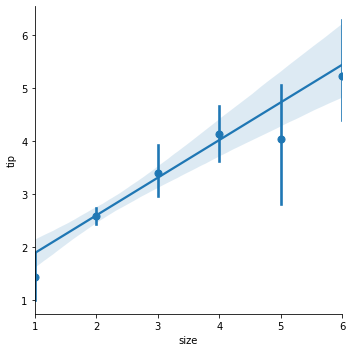

In [21]:
# 折叠每一个值，并绘制均值的估计值和置信区间

sns.lmplot(x='size', y='tip', x_estimator=np.mean, data=tips)

## 多个变量分析

当想要探究两个变量的关系如何随第三个变量的变化而变化时，可以使用$lmplot()$，它结合`regplot`使用`FAcetGrid`可以提供简单的界面

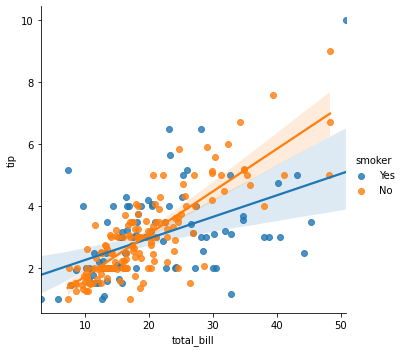

In [22]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)

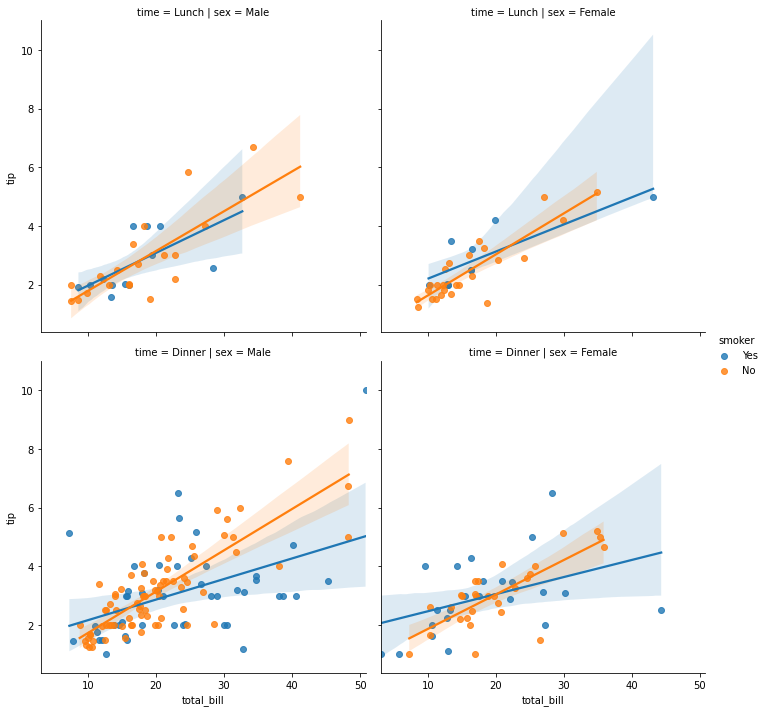

In [23]:
# 观察在三个因素(smoker, sex, time)变化的情况下(total_bill, tip)的变化关系

sns.lmplot(x='total_bill', y='tip', hue='smoker', col='sex', row='time', data=tips)

## 用残差图检验回归模型

绘制线性回归的残差图

$residplot:$ 在`x`上回归`y` (可能作为鲁棒或多项式回归)，然后绘制残差的散点图

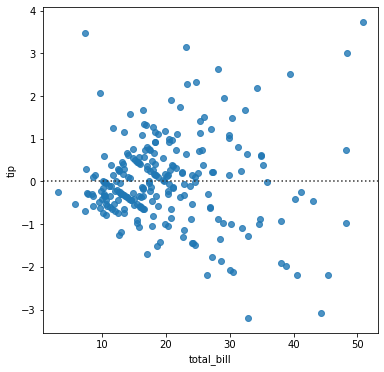

In [24]:
plt.figure(figsize=(6, 6))
sns.residplot(x='total_bill', y='tip', data=tips)